In [127]:
# importing data analysing libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [128]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [129]:
#importing plotly to make interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # requires version >= 1.9.0

In [130]:
#cufflinks is data visualization library
import cufflinks as cf

In [131]:
# For Notebooks
init_notebook_mode(connected=True)

In [112]:
# For offline use
cf.go_offline()

In [113]:
import plotly.tools as tls
# for interative map showing

In [132]:
data=pd.read_csv('C:\\Users\\MADHUSMITA\\Desktop\\data\\SampleSuperstore.csv') #reading samplesuperstorein a pandas dataframe

In [133]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [116]:
# usa state codes are not available so had to make a colum for state codes
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

In [134]:
data['state_code'] = pd.DataFrame(data['State'].apply(lambda x : state_codes[x])) # making a state codes column

In [118]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit state_code  
0      0.00   41.9136         KY  
1      0.00  219.5820         KY  
2      0.00    6.8714         CA  
3      0.45 -383.0310         FL  
4      0.20    2.5164         FL

In [135]:
data['text']='State '+data['State'].astype('str')+' Profit '+data['Profit'].astype('str')+' Sales '+data['Sales'].astype('str')+' Category '+data['Category'].astype('str')
#making a column what to show on the interactive map

In [122]:
#generating the data to make a choropleth map
data_c = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = data['state_code'],
            z = data['Sales'],
            locationmode = 'USA-states',
            text = data['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"USA-sales"}
            ) 

In [136]:
layout = dict(title = 'Exploratory business data analysis',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [137]:
import plotly.graph_objs as go

In [138]:
choromap = go.Figure(data = [data_c],layout = layout)
plot(choromap,validate=False)  #generating the choropleth map

'temp-plot.html'

In [126]:
data.iplot(kind='box') #a box plot showing the relation among each of the feature in the dataframe

In [13]:
data.iplot(kind='scatter',x='Sales',y='City',mode='markers',size=10) # a scatter plot to show the sales value in each city

In [16]:
data.iplot(kind='bar',x='Category',y='Sales')  #a bar plot to show category wise sales

In [19]:
data[['Sales','Profit']].iplot(kind='spread') # a spred plot to show the sales and profit

C:\Users\MADHUSMITA\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [22]:
import seaborn as sns #importing another data visualization library

In [28]:
pv_sales =data.pivot_table(values='Profit',index='Quantity',columns='Region')

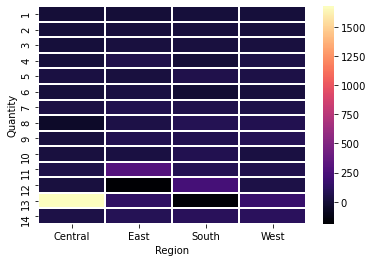

In [30]:
sns.heatmap(pv_sales,cmap='magma',linecolor='white',linewidths=1)

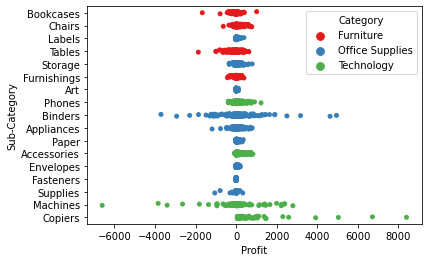

In [35]:
sns.stripplot(x='Profit', y="Sub-Category", data=data,jitter=True,hue='Category',palette='Set1')

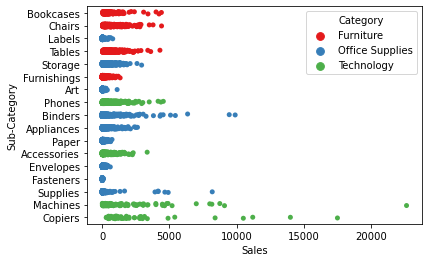

In [36]:
sns.stripplot(x='Sales', y="Sub-Category", data=data,jitter=True,hue='Category',palette='Set1')